# Sprint 2 Kevin Ma

## Written Portion

### Why this dataset was chosen
* This dataset was chosen through an API because I wanted to use a dataset that updates weekly as the fantasy basketball season progresses. I decided to use the API to collect the data for the UVA Fantasy Basketball league I am in as I was curious to see how the players I drafted performed and wanted further details on how their stats on the court contributed to my team's fantasy performance. There is also a code block where you can export the current dataset that you have created from the API that will save the dataset as 'data.csv'.
###  Data Provenance
* This data was gathered through accessing [ESPN](https://www.espn.com/) fantasy league information from the [ESPN API](https://github.com/cwendt94/espn-api). The API was created for users to gather personal insights in their fantasy leagues. The player stats and information themselves were gathered by ESPN who most likely received this information from the [NBA](https://www.nba.com/). 
### EDA
* The observations span from Weeks 1-19 (256 Observations). For the purpose of this sprint, this is currently set to weeks 1-19 as they are the weeks that have concluded in the ongoing fantasy basketball season. As the season progresses, I hope to change this number for more data. A possible feature I want to implement is the refresh button which will allow for users to see the data update in real time
* There are no missing or NaN values in this dataset
* The only categorical variable are names and week with the rest being numerical variables
* In terms of unique categorical variables, week is from 1-19 while there are 33 unique players
    * This can vary on the season as each fantasy league can set how many slots are in a starting lineup, bench or injury reserve.
    * For my league there are 10 starters, 3 bench players, and 1 injury reserve player. 
    * Players can also be dropped/added/traded which can change this value as well
* There seem to be more outliers on the upperbound than the lowerbound
* Since these are data points that were actually recorded by the players, I won't be removing or dealing with the outlier data points
* Histogram:
    * Left Skew: TO, FTA
    * Right Skew: REB, BLK, AST, FTM, STL, 3PTM
    * Symettric: PTS, FTM, FGM, Fantasy Points, Weekly Contribution Percentage
* Number of outliers by variable:

| Variable                        | Number of Outliers |
|---------------------------------|---------------------|
| TO                              | 2                   |
| REB                             | 9                   |
| BLK                             | 8                   |
| AST                             | 5                   |
| FTM                             | 8                   |
| STL                             | 7                   |
| PTS                             | 4                   |
| 3PTM                            | 3                   |
| FGA                             | 0                   |
| FGM                             | 2                   |
| FTA                             | 8                   |
| Points                          | 6                   |
| Weekly Contribution Percentage  | 3                   |

### Data Dictionary
| Column                           | Data Type | Description                            |
|----------------------------------|-----------|----------------------------------------|
| ID                               | int64     | Unique identifier for each record      |
| Week                             | category  | Week number of the season              |
| Player                           | category  | Player name                            |
| TO                               | float64   | Turnovers                              |
| REB                              | float64   | Rebounds                               |
| BLK                              | float64   | Blocks                                 |
| AST                              | float64   | Assists                                |
| FTM                              | float64   | Free throws made                       |
| STL                              | float64   | Steals                                 |
| PTS                              | float64   | Points                                 |
| 3PTM                             | float64   | Three-pointers made                    |
| FGA                              | float64   | Field goals attempted                  |
| FGM                              | float64   | Field goals made                       |
| FTA                              | float64   | Free throws attempted                  |
| Fantasy Points                   | float64   | Total Fantasy points                   |
| Weekly Contribution Percentage   | float64   | Contribution percentage for the week   |

### Potential UI Components
* A slider to filter week-by-week
* A dropdown to select players in your lineup
* Radio buttons to filter by specific player stats
* A refresh button that allows you to update the dataset and update graphs in real time
### Possible Data Visualizations
*  Create a bar chart to visualize the weekly points by player
*  Create a scatter plot to visualize the weekly points by player
*  Create a linechart of individual player fantasy point performances by week
*  A pie chart to see what player stats contribute to their fantasy points
*  A boxplot of a players fantasy points
*  A pie chart to see your total stat (PTS, STL, BLK, REB, etc) and the % each player contributes to your teams total amount of said stat

In [1]:
# Import Libraries
from espn_api.basketball import League
import pandas as pd
import plotly.express as px

In [2]:
# These variables are required for private leagues
# If league is public, these parameters are not required
espn_s2 = f"AEBxlh0p0NHPbu6WIY0O0TNX6B7oQkhT1bCnR12c5SvsUf5Dnap49bkneUfyt9h1Y5m1MBalds2N47X5i%2FE6YhYUJDbxumf3HrW1iFK%2BPWOGnTpl%2F0wbLLy7C19hr50jNoma59zfYY5iOKxOvK6yT9cn689C4OoQ%2BTiVm%2FG7TjfaGLFIKIJ8OkuSJBye7xYCgnLh%2BvD5Fbbwgz8pLX6htmu%2BEyilZCOrqQ81zDXUrRQgWhIOOXEx1Uy5d1SOQOPkdfqV%2F6Nsr2jUTvgr2T%2FS9yxs"
swid = "{5C675DD8-073A-4E00-AD7A-B926A3F2800B}"

# Create a league object
league = League(league_id=1267411756, year=2024, espn_s2=espn_s2, swid=swid)

In [3]:
# Access the scores list
# Matchup period is the week number
# This can be useful for future visualizations
# box_scores = league.box_scores(matchup_period=2)

# # Iterate through the box_scores list
# for box in box_scores:
#     print(box.away_team, box.away_lineup, box.home_team, box.home_lineup)

In [4]:
# Select a team to analyze
team_id = 2

# Create a list to store the data
data = []
lineup_points_breakdown = []
player_id = 1

# Iterate over weeks 1 to 19
for week in range(1, 20):
    # Assign the box_score variable
    box_scores = league.box_scores(matchup_period=week)
    
    # Iterate through the box_scores list
    for box in box_scores:
        # If the team you are analyizing is the home team, record information regarding team score, name and lineup
        if box.home_team.team_id == team_id:
            team_score = box.home_score
            lineup = box.home_lineup
            team_name = box.home_team.team_name
            # Append the team's weekly data to the list
            data.append({
                'Week': week,
                'Team Name': team_name,
                'Team Score': team_score,
                'Lineup': lineup,
            })

            # Extracting points breakdown for each player in the lineup
            for player in lineup:
                player_name = player.name
                player_points_breakdown = player.points_breakdown
                lineup_points_breakdown.append({
                    'ID': player_id,
                    'Week': week,
                    'Player': player_name,
                    'Points Breakdown': player_points_breakdown
                })
                player_id += 1
                
        # If the team you are analyzing is the away team, record information regarding team score, name and lineup
        elif box.away_team.team_id == team_id:
            team_score = box.away_score
            lineup = box.away_lineup
            team_name = box.away_team.team_name
            
            # Append the team's weekly data to the list
            data.append({
                'Week': week,
                'Team Name': team_name,
                'Team Score': team_score,
                'Lineup': lineup,
            })
            
            # Extracting points breakdown for each player in the lineup
            for player in lineup:
                player_name = player.name
                player_points_breakdown = player.points_breakdown
                lineup_points_breakdown.append({
                    'ID': player_id,
                    'Week': week,
                    'Player': player_name,
                    'Points Breakdown': player_points_breakdown
                })
                player_id += 1
        
    # Print the scores for the specified team to ensure that you are analyzing the correct team and are accessing the correct data
    print(f"Week {week}: {team_name} scored {team_score} points with lineup {lineup}")

# Create a pandas dataframe from the data list
df_player = pd.DataFrame(data)
points_breakdown = pd.DataFrame(lineup_points_breakdown)

# We use the explode function to separate the lineup column into individual rows by the comma to split the players
df_player = df_player.explode('Lineup')

# Add an ID column to the dataframe
df_player['ID'] = range(1, len(df_player) + 1)

# Convert the lineup column to a string to split the column into two columns
df_player['Lineup'] = df_player['Lineup'].astype(str)

# Split the lineup column into two columns: Player and Points
df_player[['Player', 'Fantasy Points']] = df_player['Lineup'].str.split(', ', expand=True)

# Remove the 'Player(' and ')' from the Player column
df_player['Player'] = df_player['Player'].str.replace(r'Player\(', '', regex=True).astype(str)

# Remove the 'points(' and ')' from the Points column
df_player['Fantasy Points'] = df_player['Fantasy Points'].str.replace(r'.*points:([\d.]+)\)', r'\1', regex=True).astype(float)

# Create a new column for the weekly contribution percentage
df_player['Weekly Contribution Percentage'] = round(df_player['Fantasy Points'] / df_player['Team Score'] * 100, 2)

# Drop the original Lineup, Team Name and Team Score columns
df_player.drop(columns=['Lineup', 'Team Name', 'Team Score'], inplace=True)
            
# Work for Second DF
# Define a function to extract each key's value from the dictionary
def extract_stat(stat_dict, stat):
    return stat_dict.get(stat, 0)  # If the stat is not present, default to 0

# Extracting all unique stats
unique_stats = set(stat for stat_dict in points_breakdown['Points Breakdown'] for stat in stat_dict.keys())

# Creating new columns for each stat
for stat in unique_stats:
    points_breakdown[stat] = points_breakdown['Points Breakdown'].apply(lambda x: extract_stat(x, stat))
    
# Drop the 'points_breakdown' column
points_breakdown.drop(columns=['Points Breakdown'], inplace=True)

Week 1: Coby Bryant scored 1057.0 points with lineup [Player(Josh Okogie, points:37.0), Player(Ausar Thompson, points:28.0), Player(Tyrese Haliburton, points:110.0), Player(Onyeka Okongwu, points:30.0), Player(Austin Reaves, points:47.0), Player(Keldon Johnson, points:77.0), Player(Darius Garland, points:24.0), Player(Aaron Gordon, points:107.0), Player(Damian Lillard, points:67.0), Player(Kawhi Leonard, points:131.0), Player(Dejounte Murray, points:88.0), Player(Jamal Murray, points:109.0), Player(Michael Porter Jr., points:99.0), Player(Chris Paul, points:103.0)]
Week 2: Coby Bryant scored 1364.0 points with lineup [Player(Tyrese Haliburton, points:169.0), Player(Jarrett Allen, points:26.0), Player(Austin Reaves, points:54.0), Player(Darius Garland, points:52.0), Player(Keldon Johnson, points:135.0), Player(Aaron Gordon, points:126.0), Player(Xavier Tillman, points:32.0), Player(Damian Lillard, points:103.0), Player(Dereck Lively II, points:12.0), Player(Kawhi Leonard, points:85.0), 

In [5]:
# Check to see if transformations were successful for points_breakdown
points_breakdown.head(5)

,ID,Week,Player,BLK,PTS,STL,FTA,REB,FGM,FGA,FTM,TO,AST,3PTM
0,1,1,Josh Okogie,4.0,17.0,0.0,-5.0,9.0,10.0,-9.0,5.0,-2.0,6.0,2.0
1,2,1,Ausar Thompson,20.0,4.0,0.0,-2.0,7.0,2.0,-7.0,1.0,-4.0,6.0,1.0
2,3,1,Tyrese Haliburton,8.0,41.0,4.0,-3.0,11.0,32.0,-32.0,3.0,-8.0,48.0,6.0
3,4,1,Onyeka Okongwu,0.0,14.0,4.0,0.0,7.0,14.0,-11.0,0.0,-2.0,4.0,0.0
4,5,1,Austin Reaves,0.0,29.0,16.0,-11.0,12.0,18.0,-30.0,8.0,-12.0,14.0,3.0


In [6]:
# Check to see if transformations were successful for df_player
df_player.head(5)

,Week,ID,Player,Fantasy Points,Weekly Contribution Percentage
0,1,1,Josh Okogie,37.0,3.50
0,1,2,Ausar Thompson,28.0,2.65
0,1,3,Tyrese Haliburton,110.0,10.41
0,1,4,Onyeka Okongwu,30.0,2.84
0,1,5,Austin Reaves,47.0,4.45


In [7]:
# Inspect the shape of the dataframes
print(df_player.shape)
print(points_breakdown.shape)


(256, 5)
(256, 14)


In [8]:
# Merge two dataframes based on ID
cleaned_df = points_breakdown.merge(df_player, how='left', on='ID')

# Drop the Week_y and Player_y columns
cleaned_df.drop(columns=['Week_y', 'Player_y'], inplace=True)
cleaned_df.rename(columns={'Week_x': 'Week', 'Player_x': 'Player'}, inplace=True)

# Change the data types of the columns to category
cleaned_df['Week'] = cleaned_df['Week'].astype('category')
cleaned_df['Player'] = cleaned_df['Player'].astype('category')

# Check to see if merge was successful
print(cleaned_df.shape)

(256, 16)


In [9]:
cleaned_df.head(5)

,ID,Week,Player,BLK,PTS,STL,FTA,REB,FGM,FGA,FTM,TO,AST,3PTM,Fantasy Points,Weekly Contribution Percentage
0,1,1,Josh Okogie,4.0,17.0,0.0,-5.0,9.0,10.0,-9.0,5.0,-2.0,6.0,2.0,37.0,3.50
1,2,1,Ausar Thompson,20.0,4.0,0.0,-2.0,7.0,2.0,-7.0,1.0,-4.0,6.0,1.0,28.0,2.65
2,3,1,Tyrese Haliburton,8.0,41.0,4.0,-3.0,11.0,32.0,-32.0,3.0,-8.0,48.0,6.0,110.0,10.41
3,4,1,Onyeka Okongwu,0.0,14.0,4.0,0.0,7.0,14.0,-11.0,0.0,-2.0,4.0,0.0,30.0,2.84
4,5,1,Austin Reaves,0.0,29.0,16.0,-11.0,12.0,18.0,-30.0,8.0,-12.0,14.0,3.0,47.0,4.45


In [10]:
# get data type information of the dataframe and makesure all the columns are present
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID                              256 non-null    int64   
 1   Week                            256 non-null    category
 2   Player                          256 non-null    category
 3   BLK                             256 non-null    float64 
 4   PTS                             256 non-null    float64 
 5   STL                             256 non-null    float64 
 6   FTA                             256 non-null    float64 
 7   REB                             256 non-null    float64 
 8   FGM                             256 non-null    float64 
 9   FGA                             256 non-null    float64 
 10  FTM                             256 non-null    float64 
 11  TO                              256 non-null    float64 
 12  AST                   

['Josh Okogie', 'Ausar Thompson', 'Tyrese Haliburton', 'Onyeka Okongwu', 'Austin Reaves', ..., 'Khris Middleton', 'Donte DiVincenzo', 'Vince Williams Jr.', 'Marvin Bagley III', 'Grayson Allen']
Length: 33
Categories (33, object): ['Aaron Gordon', 'Ausar Thompson', 'Austin Reaves', 'Chris Paul', ..., 'Vince Williams Jr.', 'Walker Kessler', 'Wendell Carter Jr.', 'Xavier Tillman']

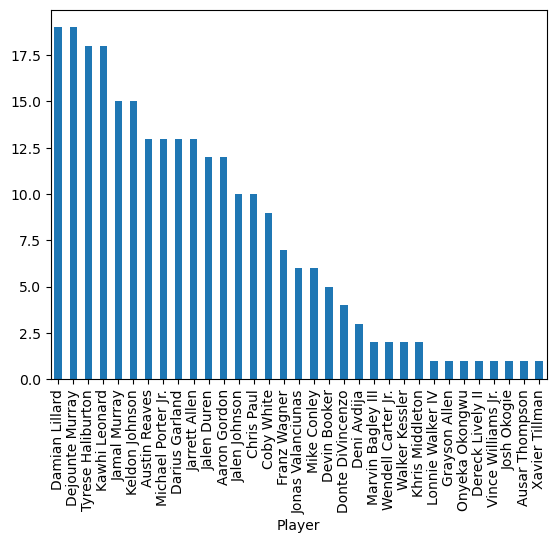

In [17]:
# How many occurances of each player in the dataset
cleaned_df['Player'].value_counts().plot(kind='bar')

# How many unique players are in the dataset
cleaned_df['Player'].unique()

In [12]:
# In case you want to export the API data to a csv file

# Set filepath to desktop
file_path = '~/Desktop/data.csv'

# Save the dataframe to a csv file
cleaned_df.to_csv(file_path, index=False)

In [13]:
# Visualize distributions of continuous variables
continuous_vars = ['TO', 'REB', 'BLK', 'AST', 'FTM', 'STL', 'PTS', '3PTM', 'FGA', 'FGM', 'FTA', 'Fantasy Points', 'Weekly Contribution Percentage']

# Plot histograms for continuous variables
for var in continuous_vars:
    if var in ['STL', 'BLK']: # These variables have a lot of 0s, so we will use a smaller number of bins
        fig = px.histogram(cleaned_df, x=var, title=f'Distribution of {var}', nbins=10)
    else:
        fig = px.histogram(cleaned_df, x=var, title=f'Distribution of {var}')
    # Display the plot    
    fig.show()

In [14]:
# Create a boxplot to visualize the distrubtion as well as outliers
fig = px.box(cleaned_df[continuous_vars], title='Boxplot of Continuous Variables')
# Display the plot
fig.show()

# Calculate the number of outliers for each continuous variable

# Calculate the first and third quartile
Q1 = cleaned_df[continuous_vars].quantile(0.25)
Q3 = cleaned_df[continuous_vars].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Calculate the number of outliers
outliers = ((cleaned_df[continuous_vars] < (Q1 - 1.5 * IQR)) | (cleaned_df[continuous_vars] > (Q3 + 1.5 * IQR))).sum()

# Print
print("Number of outliers by variable:")
print(outliers)

Number of outliers by variable:
TO                                2
REB                               9
BLK                               8
AST                               5
FTM                               8
STL                               7
PTS                               4
3PTM                              3
FGA                               0
FGM                               2
FTA                               8
Fantasy Points                    6
Weekly Contribution Percentage    3
dtype: int64


Visualization of Player Weekly Points

In [15]:
# Option 1: Create a bar chart to visualize the weekly points by player
# Create a bar chart to visualize the weekly points by player
fig = px.bar(cleaned_df, 
             # Set axis and color
             x='Player', y='Fantasy Points', color="Week",
             # Title
             title=f'Weekly Fantasy Points by Player for Team {team_name}')

# Display in descending order
fig.update_layout(xaxis={'categoryorder': 'total descending'})  

# Display the bar chart
fig.show()

# Option 2: Create a scatter plot to visualize the weekly points by player
fig = px.scatter(cleaned_df,
                 # Set axis, size, and color
                 x='Week', y='Fantasy Points', color='Player', size='Weekly Contribution Percentage',
                 # Titles and labels
                 title=f'Weekly Fantasy Points Score for Team {team_name}',
                 labels={'Fantasy Points': 'Fantasy Points', 'Week': 'Week'}, hover_name='Player', size_max=25)

# Show every tick for weeks
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
    )
)

# Display the scatter plot
fig.show()